In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/AQI-Project/master/Data/Real-Data/Real_Combine.csv')


In [8]:
data.shape

(1093, 9)

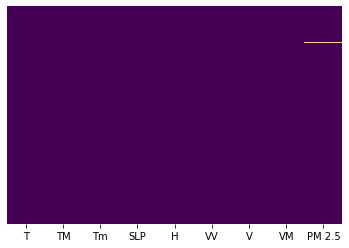

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
data = data.dropna()

In [19]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [23]:
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
print('coefficient of knn is train set:{}'.format(knn.score(X_train,Y_train)))

coefficient of knn is train set:0.7020375433790301


In [28]:
print('coefficient of knn is test set:{}'.format(knn.score(X_test,Y_test)))

coefficient of knn is test set:0.5491808529670075


In [31]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(knn,X,Y,cv=5)
cv.mean()

0.4315907907186956

In [32]:
Y_pred = knn.predict(X_test)

In [39]:
accuracy_rate =[]
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score =cross_val_score(knn,X,Y,cv=5,scoring='neg_mean_squared_error')
    accuracy_rate.append(score.mean())

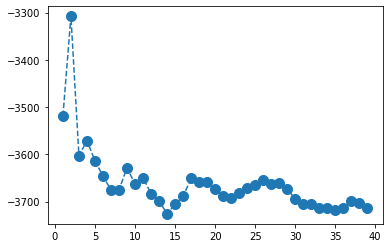

In [45]:
plt.plot(range(1,40),accuracy_rate,markersize=10,linestyle='dashed',marker='o')

In [48]:
from sklearn import metrics

In [53]:
print('mea:',metrics.mean_squared_error(Y_test,Y_pred))
print('mbe:',metrics.mean_absolute_error(Y_pred,Y_test))
print('smse:',np.sqrt(metrics.mean_squared_error(Y_pred,Y_test)))


mea: 3229.5788319063345
mbe: 38.135335365853656
smse: 56.82938352565805
